In [49]:

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import minmax_scale

In [86]:
#Extracting the training and test sets
#train_df = pd.read_csv('data/ML-CUP20-TR.csv').to_numpy()
train_df = pd.read_csv('../data/ML-CUP20-TR .csv')
test_df = pd.read_csv('../data/ML-CUP20-TS.csv')

In [93]:
# Spilitting the targets and input features
train_x = train_df.iloc[:,:-2].to_numpy()
train_y = train_df.iloc[:,[10,11]].to_numpy()
# scale the data in range(-1,1)
train_xscale = minmax_scale(train_x, feature_range=(-1,1))
train_yscale = minmax_scale(train_y, feature_range=(-1,1))

test_x = test_df.to_numpy()
test_x = minmax_scale(test_x, feature_range=(-1,1))


# Direct Multioutput Regression


In [64]:
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.multioutput import RegressorChain
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import learning_curve
from sklearn import svm

In [77]:
# define base model
SVR = svm.SVR(kernel='rbf',C=0.1, epsilon=0.1)
# define the direct multioutput wrapper model
wrapper = MultiOutputRegressor(SVR)
# define the evaluation procedure
cv = RepeatedKFold(n_splits=3, n_repeats=3, random_state=1)
n_scores = cross_val_score(wrapper, train_xscale, train_yscale,scoring='neg_mean_squared_error', cv=cv, n_jobs=5)
# force the scores to be positive
n_scores = absolute(n_scores)
# summarize performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: 0.019 (0.001)


In [69]:

train_sizes, train_scores, test_scores = learning_curve(wrapper, train_xscale, train_yscale,scoring='neg_mean_squared_error', cv=cv, n_jobs=5)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std  = np.std(train_scores, axis=1)
test_scores_mean  = np.mean(test_scores, axis=1)
test_scores_std   = np.std(test_scores, axis=1)


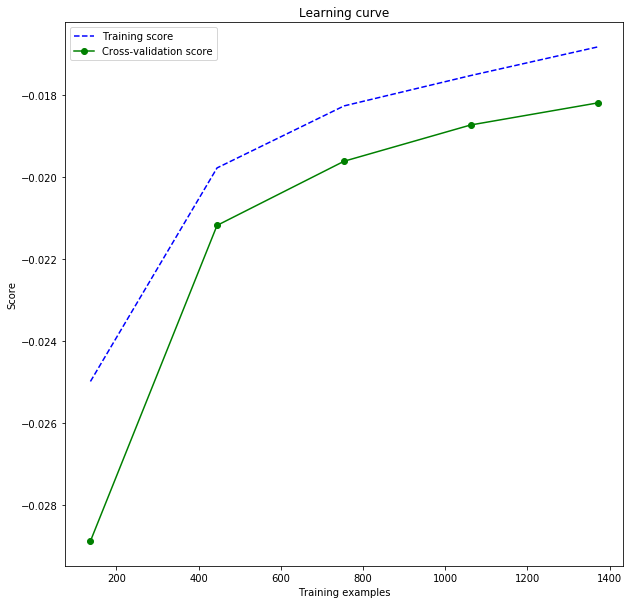

In [71]:
plt.subplots(1, figsize=(10,10))
plt.plot(train_sizes, train_scores_mean, '--', color="b",label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",label="Cross-validation score")
plt.title("Learning curve")
plt.xlabel("Training examples")
plt.ylabel("Score")                     
plt.legend(loc="best")
plt.show()

# Chained Multioutput Regression

In [72]:
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.multioutput import RegressorChain
from sklearn import svm

In [78]:
# define base model
svr = svm.SVR(kernel='rbf',C=0.1, epsilon=0.1)
# define the chained multioutput wrapper model
wrapper = RegressorChain(svr)
# define the evaluation procedure
cv = RepeatedKFold(n_splits=3, n_repeats=3, random_state=1)
n_scores = cross_val_score(wrapper, train_xscale, train_yscale,scoring='neg_mean_squared_error', cv=cv, n_jobs=5)
# force the scores to be positive
n_scores = absolute(n_scores)
# summarize performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: 0.020 (0.001)


In [79]:
train_sizes, train_scores, test_scores = learning_curve(wrapper, train_xscale, train_yscale,scoring='neg_mean_squared_error', cv=cv, n_jobs=5)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std  = np.std(train_scores, axis=1)
test_scores_mean  = np.mean(test_scores, axis=1)
test_scores_std   = np.std(test_scores, axis=1)


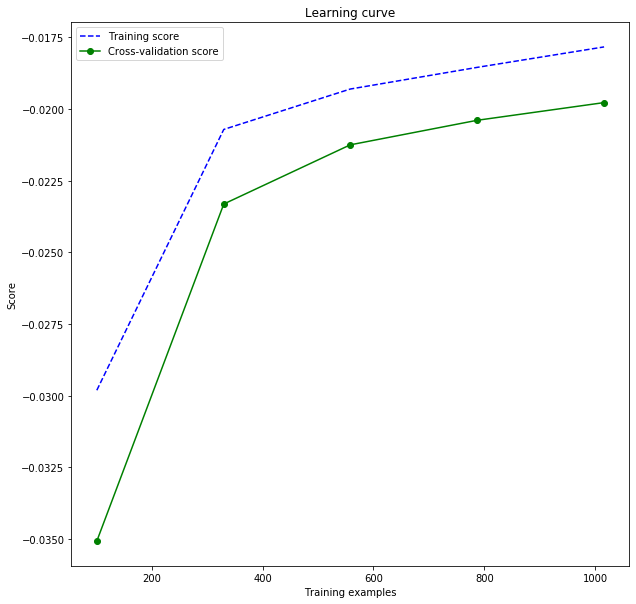

In [83]:
plt.subplots(1, figsize=(10,10))
plt.plot(train_sizes, train_scores_mean, '--', color="b",label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",label="Cross-validation score")
plt.title("Learning curve")
plt.xlabel("Training examples")
plt.ylabel("Score")                     
plt.legend(loc="best")
plt.show()

In [84]:
# fit the model on the whole dataset
wrapper.fit(train_xscale, train_yscale)

RegressorChain(base_estimator=SVR(C=0.1, cache_size=200, coef0=0.0, degree=3,
                                  epsilon=0.1, gamma='scale', kernel='rbf',
                                  max_iter=-1, shrinking=True, tol=0.001,
                                  verbose=False),
               cv=None, order=None, random_state=None)

In [95]:
chinedResult = wrapper.predict(test_x)
# summarize the prediction
print('Predicted: %s' % chinedResult[0])

Predicted: [-0.42761582 -0.47304259]
